### Analyzing the New York Times comments section

For this assignment, inspect the <a href="https://developer.nytimes.com/">NYT API</a>, specifically their API for article comments. We'll be completing two major tasks:
- find out where people are commenting from 
- get the most common words from a specific comment 

In [1]:
# import requests and json
import requests
import json

# put your custom settings for the API call here
# you MUST provide an API key, offset value, and article URL
# get your api key from here: https://developer.nytimes.com/
api_key = "OGoLO2xHyVXNYAb0QGgNSnwWQzrLvv0a"
offset = str(42)
article_url = "https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html"
sort = "reader"

# show the API url with all the settings listed out
api_url = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=%s&offset=%s&sort=%s&url=%s" %(api_key, offset, sort, article_url)
print(api_url)

https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=OGoLO2xHyVXNYAb0QGgNSnwWQzrLvv0a&offset=42&sort=reader&url=https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html


In [2]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [3]:
# look at all of the data
# it's a lot of nested dictionaries!
print(type(data))
data

<class 'dict'>


{'debug': {'version': 4, 'nyt-com-shim': True},
 'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'results': {'callerID': None,
  'api_timestamp': '1608052099',
  'comments': [{'commentID': 107567029,
    'status': 'approved',
    'commentSequence': 107567029,
    'userID': 57148903,
    'userDisplayName': 'Formerly In The Trenches',
    'userLocation': 'Atlanta',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': 'I’ve lived in Atlanta for 40 years. On a daily basis I hear people defend the monuments celebrating Confederate “war heroes.” I understand that for some, they can tie one or more family members to what is still referred to as “the war of Northern aggression.” The mindset of the Confederacy is still alive and thriving in the South. There is still anger that is carried from one generation to the next and it boils down to white supremacy. This is still a ver

In [4]:
# isolate just the comments dictionary
comments = (data['results']['comments'])
print(comments)

[{'commentID': 107567029, 'status': 'approved', 'commentSequence': 107567029, 'userID': 57148903, 'userDisplayName': 'Formerly In The Trenches', 'userLocation': 'Atlanta', 'userTitle': 'NULL', 'userURL': 'NULL', 'picURL': None, 'commentTitle': '<br\\//>', 'commentBody': 'I’ve lived in Atlanta for 40 years. On a daily basis I hear people defend the monuments celebrating Confederate “war heroes.” I understand that for some, they can tie one or more family members to what is still referred to as “the war of Northern aggression.” The mindset of the Confederacy is still alive and thriving in the South. There is still anger that is carried from one generation to the next and it boils down to white supremacy. This is still a very strong and powerful ideal within a certain segment of the Southern population. Family historical memory is a powerful, albeit often flawed, determinant.', 'createDate': '1591965553', 'updateDate': '1592155134', 'approveDate': '1591965554', 'recommendations': 38, 'rep

In [5]:
# look at just one of the comments
one_comment = comments[22]
print(one_comment)

{'commentID': 107568046, 'status': 'approved', 'commentSequence': 107568046, 'userID': 60857476, 'userDisplayName': 'Stephen', 'userLocation': 'Jacksonville', 'userTitle': 'NULL', 'userURL': 'NULL', 'picURL': None, 'commentTitle': '<br\\//>', 'commentBody': 'How many of these people that are so adamant about tearing down Columbus status are doing anything to actually help current Natives? Wanting to take down statues is fine, but there are so many other better things to do to help the underprivileged groups in this country. \n\nDonate to the Native Indian College Fund, or other nonprofits.', 'createDate': '1591967842', 'updateDate': '1592087917', 'approveDate': '1591967843', 'recommendations': 22, 'replyCount': 0, 'replies': [], 'editorsSelection': False, 'parentID': None, 'parentUserDisplayName': None, 'depth': 1, 'commentType': 'comment', 'trusted': 0, 'recommendedFlag': 0, 'permID': '107568046', 'isAnonymous': False}


In [6]:
# lowercase the comment and remove punctuation
# you can use the code we wrote for the lexical richness exercise to do this
comment_txt = one_comment["commentBody"]
comment_low = comment_txt.lower()
print(comment_low)


how many of these people that are so adamant about tearing down columbus status are doing anything to actually help current natives? wanting to take down statues is fine, but there are so many other better things to do to help the underprivileged groups in this country. 

donate to the native indian college fund, or other nonprofits.


In [7]:
# split text into list

comment2list = comment_low.split(' ') # split the string with a 'space' operator
#print(comment2list)

# create a dictionary of word frequencies!

dict = {}

for word in comment2list:
    if word in dict.keys():
        dict[word] += 1
    else:
        dict[word] = 1
        
print(dict)


# go through each word in text_data
    # if the word isn't in the dictionary, add it as a key AND give it a value of 1
    # if the word IS in the dictionary, add 1 to the value

{'how': 1, 'many': 2, 'of': 1, 'these': 1, 'people': 1, 'that': 1, 'are': 3, 'so': 2, 'adamant': 1, 'about': 1, 'tearing': 1, 'down': 2, 'columbus': 1, 'status': 1, 'doing': 1, 'anything': 1, 'to': 5, 'actually': 1, 'help': 2, 'current': 1, 'natives?': 1, 'wanting': 1, 'take': 1, 'statues': 1, 'is': 1, 'fine,': 1, 'but': 1, 'there': 1, 'other': 2, 'better': 1, 'things': 1, 'do': 1, 'the': 2, 'underprivileged': 1, 'groups': 1, 'in': 1, 'this': 1, 'country.': 1, '\n\ndonate': 1, 'native': 1, 'indian': 1, 'college': 1, 'fund,': 1, 'or': 1, 'nonprofits.': 1}


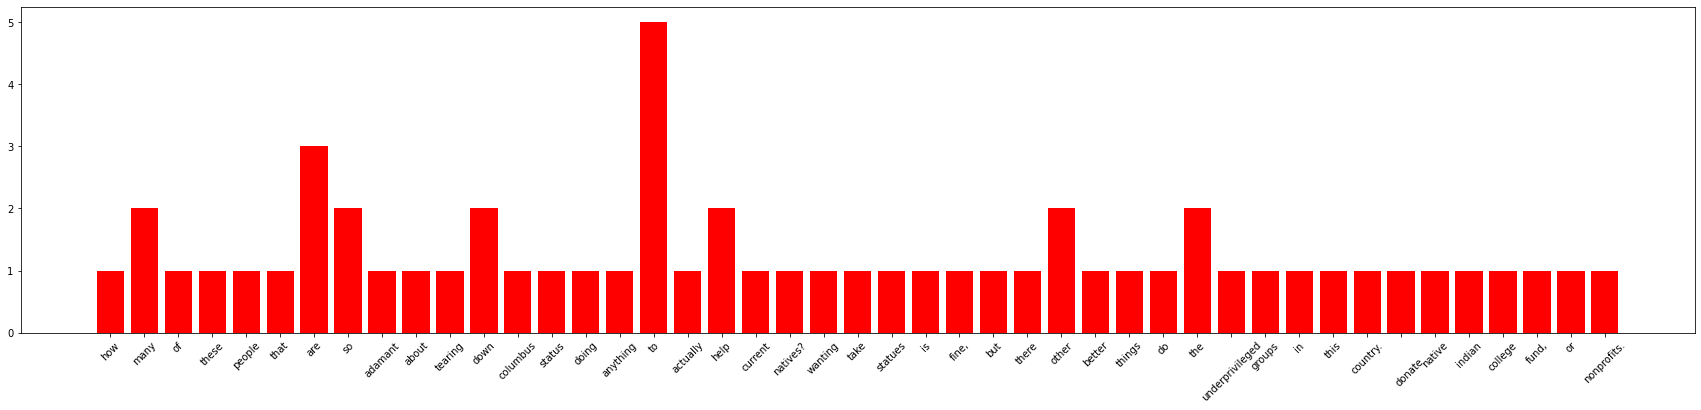

In [19]:
# try and plot out a chart of the dictionary we just created!

# 
# a dictionary of the words used & how often they appear

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(30,6))
plt.bar(range(len(dict)), list(dict.values()), align='center', color=['red'])
plt.xticks(range(len(dict)), list(dict.keys()), rotation = 45)
plt.show()